### Data description
The business meaning of each column in the data is as below

1. **GoodCredit:** Whether the issued loan was a good decision or bad
2. **checkingstatus:** Status of existing checking account.
3. **duration:** Duration of loan in months
4. **history:** Credit history of the applicant
5. **purpose:** Purpose for the loan
6. **amount:** Credit amount
7. **savings:** Savings account/bonds
8. **employ:** Present employment since
9. **installment:** Installment rate in percentage of disposable income
10. **status:** Personal status and sex
11. **others:** Other debtors / guarantors for the applicant
12. **residence:** Present residence since
13. **property:** Property type of applicant
14. **age:** Age in years
15. **otherplans:** Other installment plans
16. **housing:** Housing
17. **cards:** Number of existing credits at this bank
18. **job:** Job
19. **liable:** Number of people being liable to provide maintenance for
20. **tele:** Is the Telephone registered or not
21. **foreign:** Is the applicant a foreign worker

More information about the data:

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

### Defining the problem statement

**Creating a Predictive model which can tell whether to approve a loan application or not?**

Target Variable: GoodCredit

Predictors: duration, history, purpose, amount, savings etc.

* GoodCredit=1 means the loan was a good decision.
* GoodCredit=0 means the loan was a bad decision.

*Based on the problem statement, we can clearly understand that a supervised ML classification model is to be built, as the target variable is categorical.**

In [1]:
#retrieve data description from UCI ML repository
from urllib.request import urlretrieve
urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc', 'german.doc')
f = open('german.doc')
german_doc= f.read()
print(german_doc)

Description of the German credit dataset.

1. Title: German Credit data

2. Source Information

Professor Dr. Hans Hofmann  
Institut f"ur Statistik und "Okonometrie  
Universit"at Hamburg  
FB Wirtschaftswissenschaften  
Von-Melle-Park 5    
2000 Hamburg 13 

3. Number of Instances:  1000

Two datasets are provided.  the original dataset, in the form provided
by Prof. Hofmann, contains categorical/symbolic attributes and
is in the file "german.data".   
 
For algorithms that need numerical attributes, Strathclyde University 
produced the file "german.data-numeric".  This file has been edited 
and several indicator variables added to make it suitable for 
algorithms which cannot cope with categorical variables.   Several
attributes that are ordered categorical (such as attribute 17) have
been coded as integer.    This was the form used by StatLog.


6. Number of Attributes german: 20 (7 numerical, 13 categorical)
   Number of Attributes german.numer: 24 (24 numerical)


7.  Attribute d

In [2]:
import platform
print("Version of Python: ",platform.python_version())

import pandas as pd
print("Version of Pandas: ",pd.__version__)

Version of Python:  3.7.6
Version of Pandas:  1.1.3


3.7.6 means "Sixth maintenance release of Python 3.7"

In [3]:
# importing the dataset
import pandas as pd
CreditRiskData=pd.read_csv('CreditRiskData.csv')
print('Shape before deleting duplicate values:', CreditRiskData.shape)

# Removing duplicate rows if any
CreditRiskData=CreditRiskData.drop_duplicates()
print('Shape After deleting duplicate values:', CreditRiskData.shape)

# Printing first five rows
# Start observing the Quantitative/Qualitative variables
CreditRiskData.head()

Shape before deleting duplicate values: (1000, 21)
Shape After deleting duplicate values: (1000, 21)


,GoodCredit,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [4]:
CreditRiskData.tail()

,GoodCredit,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
995,0,A14,12,A32,A42,1736,A61,A74,3,A92,...,4,A121,31,A143,A152,1,A172,1,A191,A201
996,0,A11,30,A32,A41,3857,A61,A73,4,A91,...,4,A122,40,A143,A152,1,A174,1,A192,A201
997,0,A14,12,A32,A43,804,A61,A75,4,A93,...,4,A123,38,A143,A152,1,A173,1,A191,A201
998,1,A11,45,A32,A43,1845,A61,A73,4,A93,...,4,A124,23,A143,A153,1,A173,1,A192,A201
999,0,A12,45,A34,A41,4576,A62,A71,3,A93,...,4,A123,27,A143,A152,1,A173,1,A191,A201


### Inspecting the Target variable

**When performing Classification, if there is a balance in the the distribution of each class otherwise it impacts the ML algorithms ability to learn all the classes.**


GoodCredit
0    700
1    300
dtype: int64


<AxesSubplot:xlabel='GoodCredit'>

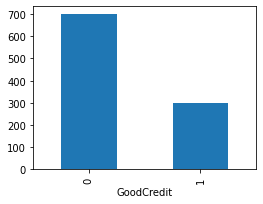

In [5]:
%matplotlib inline

# Creating Bar chart as the Target variable is Categorical
GroupedData=CreditRiskData.groupby('GoodCredit').size()
print(GroupedData)
GroupedData.plot(kind='bar', figsize=(4,3))

In [6]:
good_bad_per=round(((CreditRiskData.GoodCredit.value_counts()/CreditRiskData.GoodCredit.count())*100))
good_bad_per

0    70.0
1    30.0
Name: GoodCredit, dtype: float64

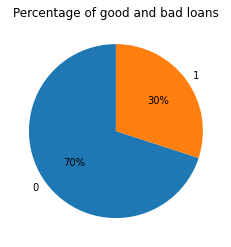

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.pie(good_bad_per,labels=['0', '1'], autopct='%1.0f%%', startangle=90)
plt.title('Percentage of good and bad loans');

In [8]:
CreditRiskData.shape

(1000, 21)

To know the data types of each column.

In [9]:
CreditRiskData.dtypes

GoodCredit         int64
checkingstatus    object
duration           int64
history           object
purpose           object
amount             int64
savings           object
employ            object
installment        int64
status            object
others            object
residence          int64
property          object
age                int64
otherplans        object
housing           object
cards              int64
job               object
liable             int64
tele              object
foreign           object
dtype: object

The type `int64` tells us that Python is storing each value within this column as a 64-bit integer. 

Inspect the description of entire data frame:

In [10]:
CreditRiskData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GoodCredit      1000 non-null   int64 
 1   checkingstatus  1000 non-null   object
 2   duration        1000 non-null   int64 
 3   history         1000 non-null   object
 4   purpose         1000 non-null   object
 5   amount          1000 non-null   int64 
 6   savings         1000 non-null   object
 7   employ          1000 non-null   object
 8   installment     1000 non-null   int64 
 9   status          1000 non-null   object
 10  others          1000 non-null   object
 11  residence       1000 non-null   int64 
 12  property        1000 non-null   object
 13  age             1000 non-null   int64 
 14  otherplans      1000 non-null   object
 15  housing         1000 non-null   object
 16  cards           1000 non-null   int64 
 17  job             1000 non-null   object
 18  liable   

Get summary stats as well as see
the count of nonnull data. 

In [12]:
# Looking at the descriptive statistics of numeric data
#CreditRiskData.describe()

# Looking at the descriptive statistics of the data
CreditRiskData.describe(include='all')

,GoodCredit,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
count,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,...,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000
unique,NaN,4,NaN,5,10,NaN,5,5,NaN,4,...,NaN,4,NaN,3,3,NaN,4,NaN,2,2
top,NaN,A14,NaN,A32,A43,NaN,A61,A73,NaN,A93,...,NaN,A123,NaN,A143,A152,NaN,A173,NaN,A191,A201
freq,NaN,394,NaN,530,280,NaN,603,339,NaN,548,...,NaN,332,NaN,814,713,NaN,630,NaN,596,963
mean,0.300000,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,...,2.845000,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN
std,0.458487,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,...,1.103718,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN
min,0.000000,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,...,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
25%,0.000000,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,...,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,0.000000,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,...,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,1.000000,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,...,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN


In [13]:
pd.set_option('precision', 2)
CreditRiskData.describe()

,GoodCredit,duration,amount,installment,residence,age,cards,liable
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,0.30,20.90,3271.26,2.97,2.85,35.55,1.41,1.16
std,0.46,12.06,2822.74,1.12,1.10,11.38,0.58,0.36
min,0.00,4.00,250.00,1.00,1.00,19.00,1.00,1.00
25%,0.00,12.00,1365.50,2.00,2.00,27.00,1.00,1.00
50%,0.00,18.00,2319.50,3.00,3.00,33.00,1.00,1.00
75%,1.00,24.00,3972.25,4.00,4.00,42.00,2.00,1.00
max,1.00,72.00,18424.00,4.00,4.00,75.00,4.00,2.00


### Missing values treatment


In [14]:
CreditRiskData.isnull().sum()

GoodCredit        0
checkingstatus    0
duration          0
history           0
purpose           0
amount            0
savings           0
employ            0
installment       0
status            0
others            0
residence         0
property          0
age               0
otherplans        0
housing           0
cards             0
job               0
liable            0
tele              0
foreign           0
dtype: int64

In [15]:
CreditRiskData.isnull().sum(axis=1).loc[:10]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

### Univariate Analysis: Graphs for one variable
Categorical variable: Bar chart

Continuous variable: Histogram

In [16]:
# Plotting multiple bar charts at once for categorical variables
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    import matplotlib.pyplot as plt
        
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))
      
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

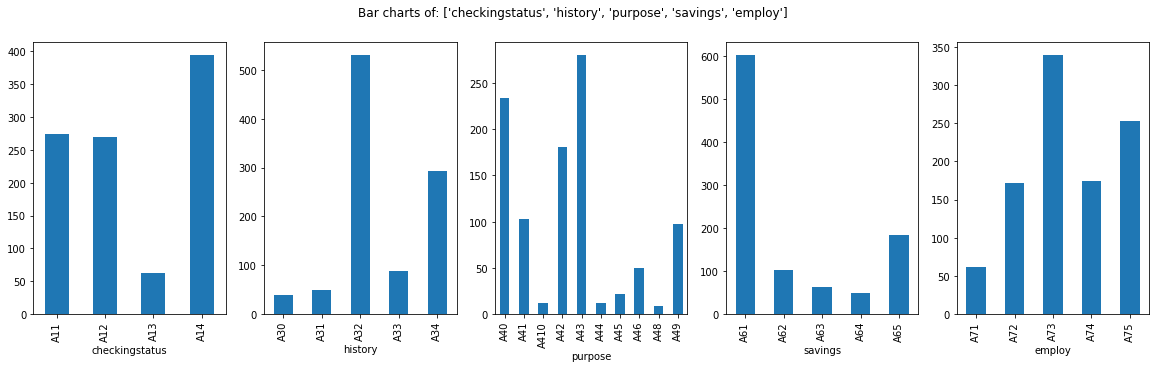

In [17]:
# Calling the function for 5 columns
PlotBarCharts(inpData=CreditRiskData, 
              colsToPlot=['checkingstatus', 'history', 'purpose','savings','employ'])

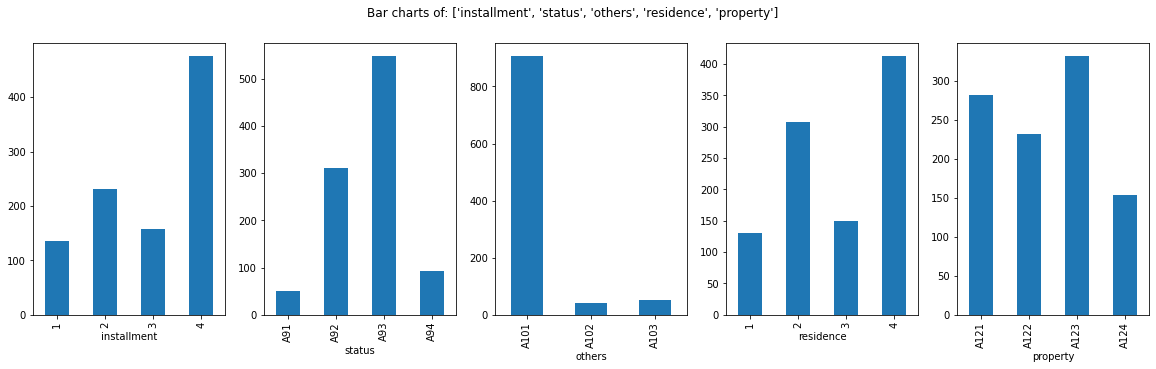

In [18]:
PlotBarCharts(inpData=CreditRiskData, 
              colsToPlot=['installment', 'status', 'others','residence', 'property'])

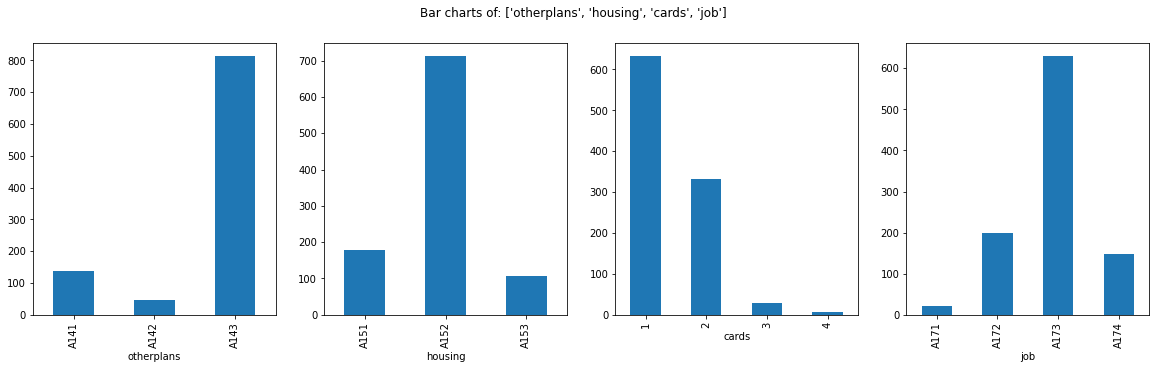

In [19]:
PlotBarCharts(inpData=CreditRiskData, 
              colsToPlot=['otherplans', 'housing', 'cards', 'job'])

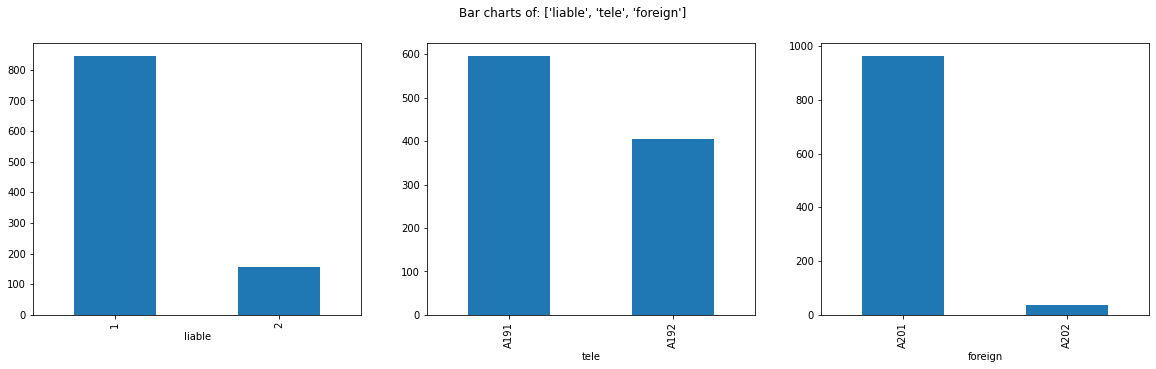

In [20]:
PlotBarCharts(inpData=CreditRiskData, 
              colsToPlot=['liable', 'tele', 'foreign'])

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'amount'}>],
       [<AxesSubplot:title={'center':'duration'}>, <AxesSubplot:>]],
      dtype=object)

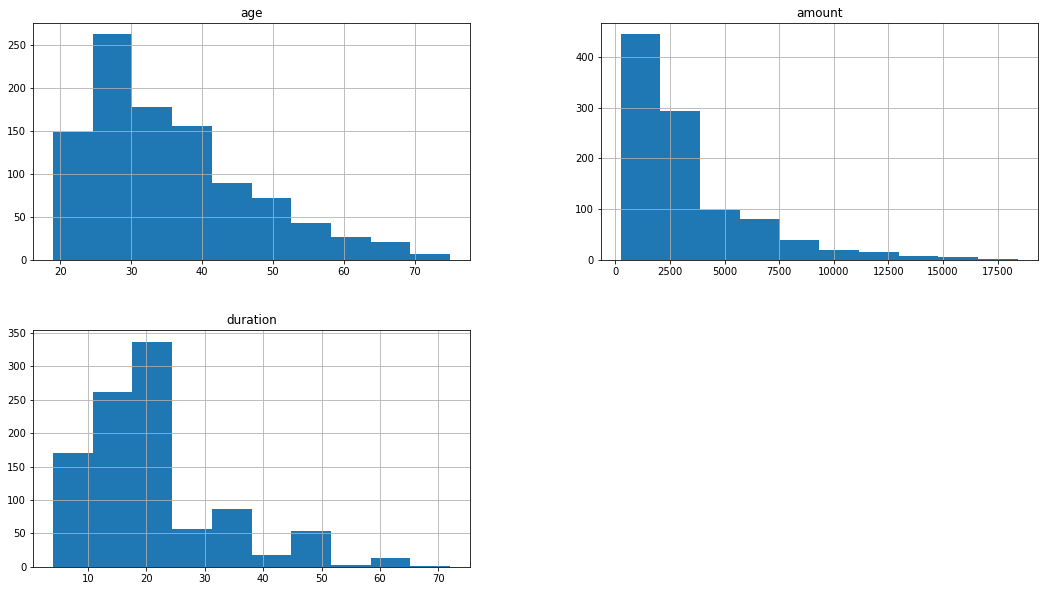

In [21]:
# Plotting histograms of multiple columns together
CreditRiskData.hist(['age', 'amount','duration'], figsize=(18,10))

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, 

<AxesSubplot:>

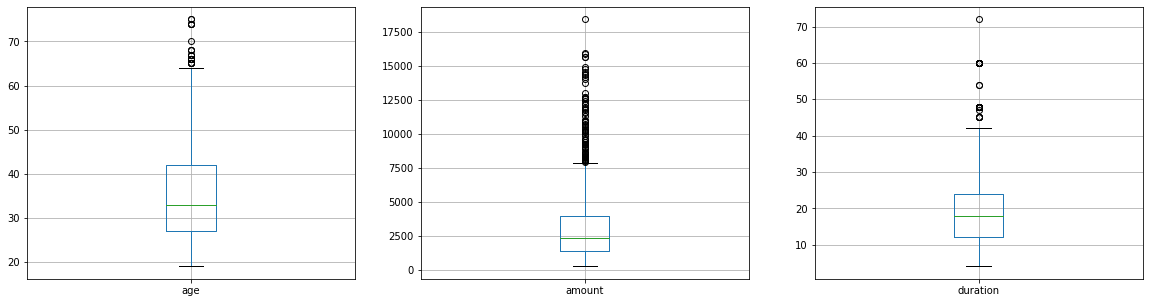

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, subPlot=plt.subplots(nrows=1, ncols=3,figsize=(20,5))
CreditRiskData.boxplot('age',ax=subPlot[0])
CreditRiskData.boxplot('amount',ax=subPlot[1])
CreditRiskData.boxplot('duration',ax=subPlot[2])

**observations:**
most of the credits amounts are between 1000 to 4500 dollars. The credit amount is positively skewed. Most of the loan duration is from 15 to 30 months. Majority of the loan applicants have age between 28 - 43.

### Bivariate Analysis


The Target variable is categorical, hence below two scenarios will be present

Categorical Target Variable Vs Continuous Predictor

Categorical Target Variable Vs Categorical Predictor

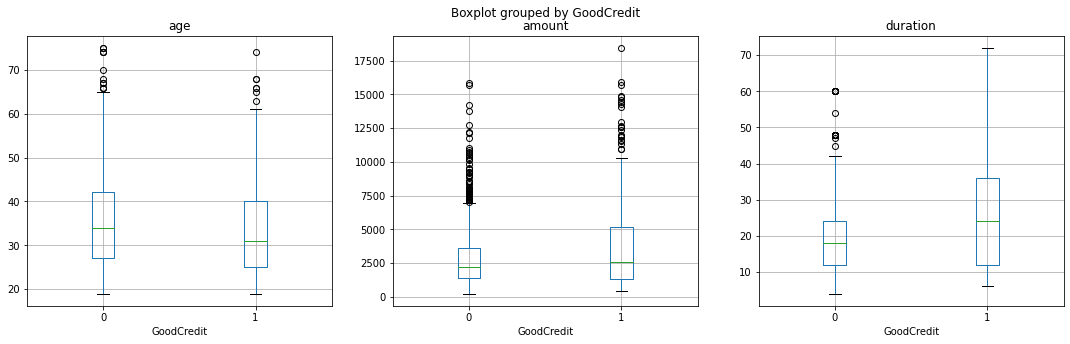

In [23]:
# Box plots for Categorical Target Variable "GoodCredit" and continuous predictors
ContinuousColsList=['age','amount', 'duration']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "GoodCredit"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    CreditRiskData.boxplot(column=PredictorCol, by='GoodCredit', figsize=(5,5), vert=True, ax=PlotCanvas[i])


Look at the first chart "age" Vs "GoodCredit". The boxes are in the similar line! It means that people whose loan was rejected and whose loan was approved have same kind of age. Hence, I cannot distinguish between approval and rejection based on the age of an applicant. So this column is NOT correlated with the GoodCredit.

The other two charts also exhibit opposite characteristics, hence "amount" and "duration" are correlated with the target variable.

We confirm this by looking at the results of ANOVA test below:

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [24]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [25]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['age', 'amount','duration']
FunctionAnova(inpData=CreditRiskData, TargetVariable='GoodCredit', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

age is correlated with GoodCredit | P-Value: 0.003925339398278295
amount is correlated with GoodCredit | P-Value: 8.797572373533373e-07
duration is correlated with GoodCredit | P-Value: 6.488049877187189e-12


['age', 'amount', 'duration']

In [26]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=CreditRiskData['checkingstatus'], columns=CreditRiskData['GoodCredit'])
CrossTabResult

GoodCredit,0,1
checkingstatus,,
A11,139,135
A12,164,105
A13,49,14
A14,348,46


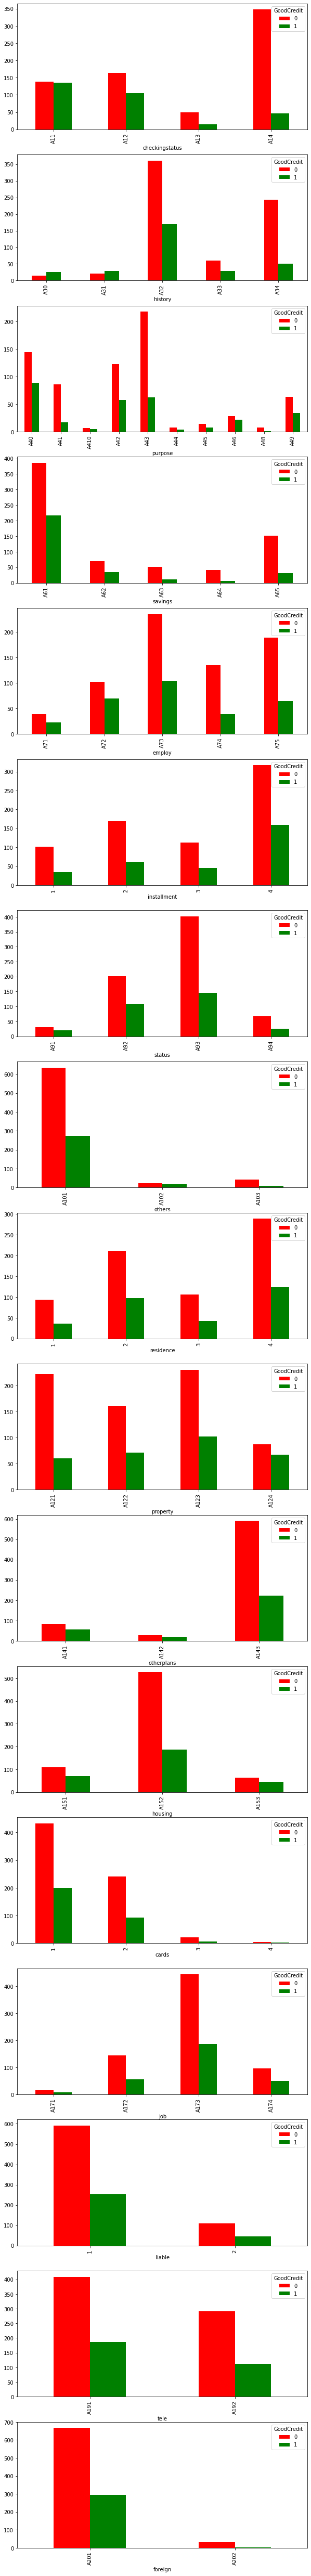

In [27]:
#Visual Inference using Grouped Bar charts
CategoricalColsList=['checkingstatus', 'history', 'purpose','savings','employ',
                     'installment', 'status', 'others','residence', 'property',
                     'otherplans', 'housing', 'cards', 'job', 'liable', 'tele', 'foreign']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,90))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "GoodCredit"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=CreditRiskData[CategoricalCol], columns=CreditRiskData['GoodCredit'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i])

Look at the "tele" Vs "GoodCredit" plot.
The 0 vs 1 ratio for A191 is similar to A192, it means tele does not affect the Good/Bad Credit!. Hence, these two variables are not correlated.

On the other hand, look at the "history" vs "GoodCredit" plot. The number of Bad Credits are very high if history=A32 and A34. It means history affects the Good/Bad Credit! Hence, two columns are correlated with each other.

Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True

In [28]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [29]:
CategoricalVariables=['checkingstatus', 'history', 'purpose','savings','employ',
                     'installment', 'status', 'others','residence', 'property',
                     'otherplans', 'housing', 'cards', 'job', 'liable', 'tele', 'foreign']

# Calling the function
FunctionChisq(inpData=CreditRiskData, 
              TargetVariable='GoodCredit',
              CategoricalVariablesList= CategoricalVariables)

checkingstatus is correlated with GoodCredit | P-Value: 1.2189020722893755e-26
history is correlated with GoodCredit | P-Value: 1.2791872956751013e-12
purpose is correlated with GoodCredit | P-Value: 0.00011574910079691586
savings is correlated with GoodCredit | P-Value: 2.7612142385682596e-07
employ is correlated with GoodCredit | P-Value: 0.001045452349140254
installment is NOT correlated with GoodCredit | P-Value: 0.1400333122128481
status is correlated with GoodCredit | P-Value: 0.02223800546926877
others is correlated with GoodCredit | P-Value: 0.036055954027247226
residence is NOT correlated with GoodCredit | P-Value: 0.8615521320413175
property is correlated with GoodCredit | P-Value: 2.8584415733250017e-05
otherplans is correlated with GoodCredit | P-Value: 0.0016293178186473534
housing is correlated with GoodCredit | P-Value: 0.00011167465374597684
cards is NOT correlated with GoodCredit | P-Value: 0.4451440800083001
job is NOT correlated with GoodCredit | P-Value: 0.596581591

['checkingstatus',
 'history',
 'purpose',
 'savings',
 'employ',
 'status',
 'others',
 'property',
 'otherplans',
 'housing',
 'foreign']

In [30]:
SelectedColumns=['checkingstatus','history','purpose','savings','employ',
 'status','others','property','otherplans','housing','foreign',
 'age', 'amount', 'duration']

# Selecting final columns
DataForML=CreditRiskData[SelectedColumns]
DataForML.head()

,checkingstatus,history,purpose,savings,employ,status,others,property,otherplans,housing,foreign,age,amount,duration
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A201,67,1169,6
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A201,22,5951,48
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A201,49,2096,12
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A201,45,7882,42
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A201,53,4870,24


In [31]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

### Converting Ordinal variables to numeric using business mapping
Based on the information on the column values explanation from the data website "employ" column has ordinal properties.

In [32]:
# Treating the Ordinal variable first
DataForML['employ'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 }, inplace=True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


### Converting the binary nominal variable to numeric using 1/0 mapping

In [33]:
# Treating the binary nominal variable
DataForML['foreign'].replace({'A201':1, 'A202':0}, inplace=True)

# Looking at data after nominal treatment
DataForML.head()

,checkingstatus,history,purpose,savings,employ,status,others,property,otherplans,housing,foreign,age,amount,duration
0,A11,A34,A43,A65,5,A93,A101,A121,A143,A152,1,67,1169,6
1,A12,A32,A43,A61,3,A92,A101,A121,A143,A152,1,22,5951,48
2,A14,A34,A46,A61,4,A93,A101,A121,A143,A152,1,49,2096,12
3,A11,A32,A42,A61,4,A93,A103,A122,A143,A153,1,45,7882,42
4,A11,A33,A40,A61,3,A93,A101,A124,A143,A153,1,53,4870,24


### Converting nominal variables to numeric using get_dummies()

In [34]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['GoodCredit']=CreditRiskData['GoodCredit']

# Printing sample rows
DataForML_Numeric.head()

,employ,foreign,age,amount,duration,checkingstatus_A11,checkingstatus_A12,checkingstatus_A13,checkingstatus_A14,history_A30,...,property_A122,property_A123,property_A124,otherplans_A141,otherplans_A142,otherplans_A143,housing_A151,housing_A152,housing_A153,GoodCredit
0,5,1,67,1169,6,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,3,1,22,5951,48,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,4,1,49,2096,12,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,4,1,45,7882,42,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,3,1,53,4870,24,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1


In [35]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['employ', 'foreign', 'age', 'amount', 'duration', 'checkingstatus_A11',
       'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
       'history_A30', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
       'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
       'others_A102', 'others_A103', 'property_A121', 'property_A122',
       'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
       'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153',
       'GoodCredit'],
      dtype='object')

In [36]:
# Separate Target Variable and Predictor Variables
TargetVariable='GoodCredit'
Predictors=['employ', 'foreign', 'age', 'amount', 'duration', 'checkingstatus_A11',
       'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
       'history_A30', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
       'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
       'others_A102', 'others_A103', 'property_A121', 'property_A122',
       'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
       'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

In [37]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 46)
(700,)
(300, 46)
(300,)


### 1. Logistic Regression 

In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithmd
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       209
           1       0.65      0.45      0.53        91

    accuracy                           0.76       300
   macro avg       0.72      0.67      0.69       300
weighted avg       0.75      0.76      0.75       300

[[187  22]
 [ 50  41]]
Accuracy of the model on Testing Sample Data: 0.75

Accuracy values for 10-fold Cross Validation:
 [0.77781287 0.68       0.72238245 0.73549151 0.76028751 0.82631579
 0.63522013 0.78407524 0.78113208 0.77519841]

Final Average Accuracy of the model: 0.75


* 'accuracy'-Percent of correct predictions
* 'precision'-Ability to find only relevant samples (not label a negative as a positive)
* 'recall'-Ability to find all positive samples
* 'macro'-Unweighted average of metric
* 'weighted'-Multiclass weighted average of metric

### 2. Decision Trees

DecisionTreeClassifier(max_depth=4)
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       209
           1       0.48      0.33      0.39        91

    accuracy                           0.69       300
   macro avg       0.61      0.59      0.59       300
weighted avg       0.66      0.69      0.67       300

[[177  32]
 [ 61  30]]
Accuracy of the model on Testing Sample Data: 0.67

Accuracy values for 10-fold Cross Validation:
 [0.73734823 0.68       0.7343254  0.65257937 0.66798419 0.64715447
 0.70133333 0.72       0.71433083 0.70133333]

Final Average Accuracy of the model: 0.7


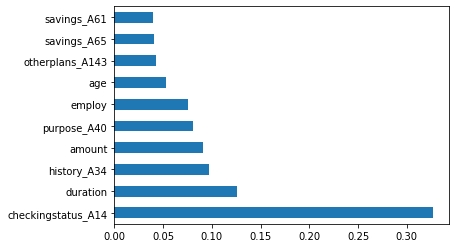

In [40]:
#Decision Trees
from sklearn import tree
# choose from different tunable hyper parameters
# Choose various values of max_depth and criterion for tuning the model
clf = tree.DecisionTreeClassifier(max_depth=4,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### 3. Random Forest

RandomForestClassifier(max_depth=10)
              precision    recall  f1-score   support

           0       0.75      0.92      0.83       209
           1       0.64      0.31      0.41        91

    accuracy                           0.74       300
   macro avg       0.70      0.62      0.62       300
weighted avg       0.72      0.74      0.70       300

[[193  16]
 [ 63  28]]
Accuracy of the model on Testing Sample Data: 0.7

Accuracy values for 10-fold Cross Validation:
 [0.76533333 0.72867133 0.73549151 0.73104474 0.74796273 0.72224231
 0.71411643 0.7917953  0.72043011 0.75256116]

Final Average Accuracy of the model: 0.74


<AxesSubplot:>

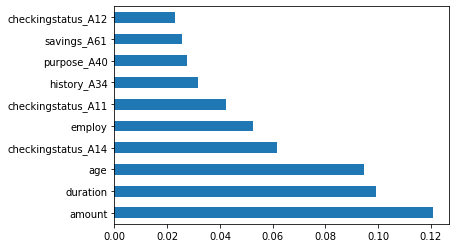

In [41]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose various values of max_depth, n_estimators and criterion for tuning the model
clf = RandomForestClassifier(max_depth=10, n_estimators=100,criterion='gini')


# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

### 4. AdaBoost

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.01, n_estimators=200)
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       209
           1       0.61      0.45      0.52        91

    accuracy                           0.75       300
   macro avg       0.70      0.66      0.67       300
weighted avg       0.73      0.75      0.73       300

[[183  26]
 [ 50  41]]
Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.76118421 0.69605263 0.7257269  0.76987902 0.75256116 0.76902287
 0.66649547 0.75256116 0.77781287 0.77407758]

Final Average Accuracy of the model: 0.74


<AxesSubplot:>

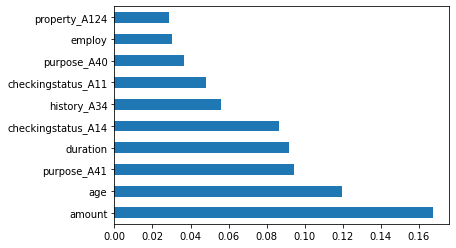

In [42]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
# Choose different values of max_depth, n_estimators and learning_rate to tune the model
DTC=DecisionTreeClassifier(max_depth=4)
clf = AdaBoostClassifier(n_estimators=200, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

### 5. XGBOOST

In [ ]:
!pip install xgboost

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
[15:03:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.77      0.89      0.82       209
           1       0.60      0.38      0.47        91

    accuracy                           0.74       300
   macro avg       0.69      0.64      0.65       300
weighted avg       0.72      0.74      0.72       300

[[186  23]
 [ 56  35]]
Accuracy of the model on Testing Sample Data: 0.72
[15:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:03:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:03:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:03:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:03:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:03:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:03:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:03:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:03:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy values for 10-fold Cross Validation:
 [0.78113208 0.67690925 0.7511499  0.70606061 0.70541038 0.79002079
 0.82520376 0.75159817 0.70602911 0.76028751]

Final Average Accuracy of the model: 0.75


<AxesSubplot:>

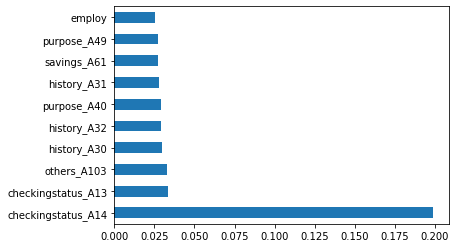

In [43]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=200, objective='binary:logistic', booster='gbtree')


print(clf)


XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Datafrom sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))


F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

### 6. SVM

In [44]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=2, kernel='rbf', gamma=0.1)


print(clf)


SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)


from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))


F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


from sklearn.model_selection import cross_val_score


Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVC(C=2, gamma=0.1)
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       209
           1       0.00      0.00      0.00        91

    accuracy                           0.69       300
   macro avg       0.35      0.50      0.41       300
weighted avg       0.48      0.69      0.57       300

[[208   1]
 [ 91   0]]
Accuracy of the model on Testing Sample Data: 0.57

Accuracy values for 10-fold Cross Validation:
 [0.57647059 0.57647059 0.57647059 0.57159763 0.57647059 0.57647059
 0.57647059 0.57647059 0.57647059 0.57647059]

Final Average Accuracy of the model: 0.58


### 7. Naive Bayes

In [45]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()


print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

GaussianNB()
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       209
           1       0.54      0.67      0.60        91

    accuracy                           0.73       300
   macro avg       0.69      0.71      0.70       300
weighted avg       0.75      0.73      0.74       300

[[158  51]
 [ 30  61]]
Accuracy of the model on Testing Sample Data: 0.74

Accuracy values for 10-fold Cross Validation:
 [0.72923077 0.71751767 0.72       0.71578348 0.74230949 0.77295794
 0.65405405 0.73347237 0.75321515 0.76553596]

Final Average Accuracy of the model: 0.73


### Deployment
Based on the above trials we select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

I am choosing SVM as the final model since it is very fast on this high dimensional data.

In order to deploy the model we follow below steps




In this data, the most important predictor variables are 'employ', 'age', 'amount', 'duration','checkingstatus', 'history', 'purpose', 'savings', and 'status'. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [46]:
# Separate Target Variable and Predictor Variables
TargetVariable='GoodCredit'

Predictors=['employ', 'age', 'amount', 'duration','checkingstatus_A11',
       'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
       'history_A30', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49','savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
       'status_A91', 'status_A92', 'status_A93', 'status_A94']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
#PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
#PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
#X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1000, 32)
(1000,)


###  Retraining the model using 100% data

In [47]:
# Using the SVM algorithm with final hyperparamters
from sklearn import svm
clf = svm.SVC(C=4, kernel='rbf', gamma=0.1)

# Training the model on 100% Data available
Final_SVM_Model=clf.fit(X,y)

In [48]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(Final_SVM_Model, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.57647059 0.57647059 0.57159763 0.57159763 0.57647059 0.57647059
 0.57159763 0.57647059 0.57647059 0.57647059]

Final Average Accuracy of the model: 0.58


### .Saving the model as a serialized file which can be stored anywhere

In [49]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library

with open('Final_SVM_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_SVM_Model, fileWriteStream)
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Admin\Documents\3-Personal\4-GL-New2\Case Study1-Classification-CreditRisk


### Creating a python function

In [50]:
# This Function can be called from any from any front end tool/website
def PredictLoanStatus(InputLoanDetails):
    import pandas as pd
    Num_Inputs=InputLoanDetails.shape[0]
    
   
    DataForML=pd.read_pickle('DataForML.pkl')
    InputLoanDetails=InputLoanDetails.append(DataForML)
    
    InputLoanDetails['employ'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 }, inplace=True)
    
    InputLoanDetails=pd.get_dummies(InputLoanDetails)
            
    Predictors=['employ', 'age', 'amount', 'duration','checkingstatus_A11',
       'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
       'history_A30', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49','savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
       'status_A91', 'status_A92', 'status_A93', 'status_A94']
    
    X=InputLoanDetails[Predictors].values[0:Num_Inputs]
    
    import pickle
    with open('Final_SVM_Model.pkl', 'rb') as fileReadStream:
        SVM_model=pickle.load(fileReadStream)
        fileReadStream.close()
            
    Prediction=SVM_model.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictedStatus)

In [51]:
# Calling the function for some loan applications manually
NewLoanApplications=pd.DataFrame(
    data=[['A73',22,5951,48,'A12','A32','A43','A61','A92'],
          ['A72',40,8951,24,'A12','A32','A43','A61','A92']],
    
    columns=['employ', 'age', 'amount', 'duration','checkingstatus', 
             'history', 'purpose', 'savings','status'])

print(NewLoanApplications)

# Calling the Function for prediction
PredictLoanStatus(InputLoanDetails= NewLoanApplications)

  employ  age  amount  duration checkingstatus history purpose savings status
0    A73   22    5951        48            A12     A32     A43     A61    A92
1    A72   40    8951        24            A12     A32     A43     A61    A92


,Predicted Status
0,1
1,0
